In [1]:
import numpy as np              # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import math

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0042"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap


In [2]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0042/RD0042


yt : [INFO     ] 2023-06-26 14:37:12,846 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2023-06-26 14:37:12,847 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-26 14:37:12,847 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-26 14:37:12,848 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-26 14:37:12,849 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-26 14:37:12,850 Parameters: current_redshift          = 0
yt : [INFO     ] 2023-06-26 14:37:12,850 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-26 14:37:12,851 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-26 14:37:12,851 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-06-26 14:37:12,852 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9


Parsing Hierarchy : 100%|█████████████████| 4251/4251 [00:00<00:00, 9132.92it/s]
yt : [INFO     ] 2023-06-26 14:37:13,525 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


yt : [INFO     ] 2023-06-26 14:37:18,084 Projection completed
yt : [INFO     ] 2023-06-26 14:37:24,534 Making a fixed resolution buffer of (('gas', 'metallicity')) 70 by 70


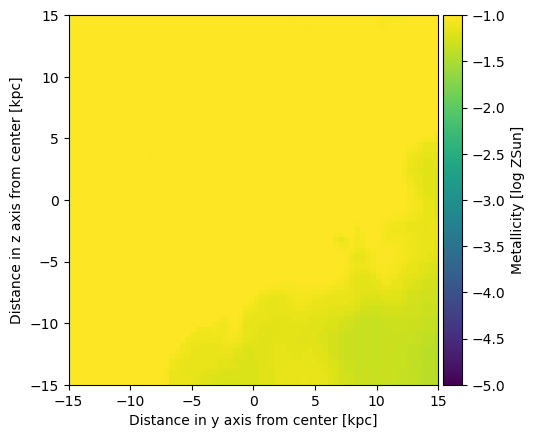

In [3]:
matplotlib.use("Agg")

size = 30 #FRB was restricting everything inside a box with a length of 10 kpc. 
xres = 70
yres = 70
axis = "x"
axis2 = "y"
axis3 = "z"

proj = ds.proj(("gas", "metallicity"), axis , center = ds.halo_center_kpc, 
                data_source = refine_box, weight_field = "density")

proj2 = ds.proj(("gas", "metallicity"), axis2 , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")

proj3 = ds.proj(("gas", "metallicity"), axis3 , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")


width = (size, "kpc")  

res = [xres,yres] 

frb = proj.to_frb(width, res, center = ds.halo_center_kpc)

frb2 = proj2.to_frb(width, res, center = ds.halo_center_kpc)

frb3 = proj3.to_frb(width, res, center = ds.halo_center_kpc)


# Q1 : How to tell which axis is y / z ? => By proj.plot()

# Res actaully works? => It does but due to intrisnic limitation of original data (AMR), Res>70 doens't do good

%matplotlib inline

#plt.title("Metallicity plot of Tempest RD0042")
#plt.xlabel('Distance in y axis from center [kpc]')
#plt.ylabel('Distance in z axis from center [kpc]')
#plt.imshow(np.array(frb["gas", "metallicity"]), cmap='Reds', extent=[-10,10,-10,10])


fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(np.log10(np.array(frb["gas","metallicity"])), 
                        cmap='viridis', extent = [-size/2, size/2, -size/2, size/2], vmin = -5,vmax = -1)
fig.colorbar(im, cax=cax, orientation='vertical')

cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Metallicity [log ZSun]') #=> change this to density & increase the fontsize 

#ax.set_title("Metallicity plot of Tempest RD0042")
ax.set_xlabel('Distance in y axis from center [kpc]')
ax.set_ylabel('Distance in z axis from center [kpc]')

plt.show()

#plt.savefig(foggie_output + 'FRB_90.png') 

In [4]:
# 1 index = 285pc 

In [5]:
od = np.array(frb["gas","metallicity"])
od2 = np.array(frb2["gas","metallicity"])
od3 = np.array(frb3["gas","metallicity"])

Text(0, 0.5, 'Metallicity [log ZSun]')

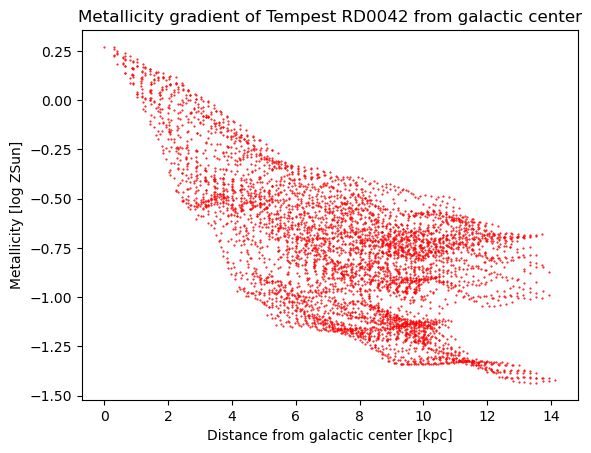

In [6]:
OD_Met = []
OD_Rad = []
for i in range(70):
    for j in range(70):
        this_metal_value = od[i][j]
        xindex = i
        yindex = j
        Radius = (math.sqrt(((yindex-34)**2+(xindex-34)**2)))*0.2857
        #print(this_metal_value, Radius)
        OD_Met.append(this_metal_value)
        OD_Rad.append(Radius)
        
        
plt.plot(OD_Rad, np.log10(OD_Met), 'ro', markersize = 0.5)
plt.plot()
plt.title("Metallicity gradient of Tempest RD0042 from galactic center")
plt.xlabel("Distance from galactic center [kpc]")
plt.ylabel("Metallicity [log ZSun]")

In [7]:
OD_Met2 = []
OD_Rad2 = []
for i in range(70):
    for j in range(70):
        this_metal_value2 = od2[i][j]
        xindex2 = i
        yindex2 = j
        Radius2 = (math.sqrt(((yindex2-34)**2+(xindex2-34)**2)))*0.2857
        #print(this_metal_value, Radius)
        OD_Met2.append(this_metal_value2)
        OD_Rad2.append(Radius2)

In [8]:
OD_Met3 = []
OD_Rad3 = []
for i in range(70):
    for j in range(70):
        this_metal_value3 = od3[i][j]
        xindex3 = i
        yindex3 = j
        Radius3 = (math.sqrt(((yindex3-34)**2+(xindex3-34)**2)))*0.2857
        #print(this_metal_value, Radius)
        OD_Met3.append(this_metal_value3)
        OD_Rad3.append(Radius3)

(-1.3, 0.4)

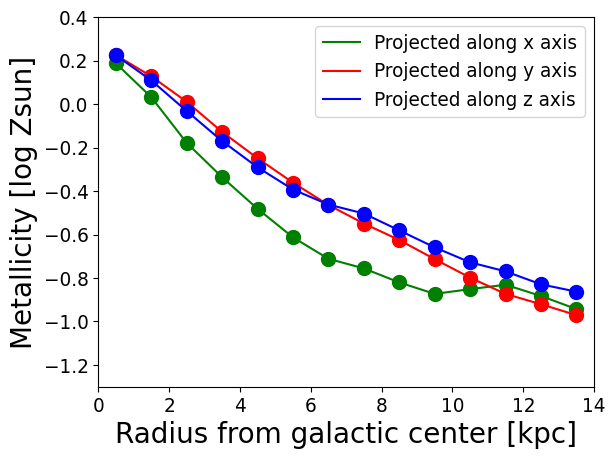

In [9]:
#Basic parameters 

#max_radius = size/2 #actual maximum radius [kpc]
max_radius = 14 #actual maximum radius [kpc]
min_radius = 0      #actual minimum radius [kpc]
increment = 1     #Radius increment per bin [kpc]


#Creating bins for x axial metallicity plot = loop over & make a function input x,y => x,y binned array? 
Xindex = []
Yindex = []
Zindex =[]
#So like an array that has 3 elements ODMet1 ODMet2 and ODMet3 and then run a for loop for
# 


#for ~ :

index = 0 
metallicitylist = []
sort = np.argsort(OD_Rad)
sorted_radius = np.array(OD_Rad)[sort]
sorted_metallicity = np.array(OD_Met)[sort]
radiuslist = np.arange(min_radius, max_radius, increment) + increment/2
while index < len(radiuslist):
    left_edge = index*increment
    right_edge = left_edge + increment 
    new_metallicity = np.array(sorted_metallicity)[(left_edge <= sorted_radius) & (sorted_radius < right_edge)]
    metallicitylist.append((np.mean(new_metallicity)))
    index +=1

        
        
        
        
        
        
#Creating bins for y axial metallicity plot
index2 = 0 
metallicitylist2 = []
sort2 = np.argsort(OD_Rad2)
sorted_radius2 = np.array(OD_Rad2)[sort2]
sorted_metallicity2 = np.array(OD_Met2)[sort2]
radiuslist2 = np.arange(min_radius, max_radius, increment) + increment/2
while index2 < len(radiuslist2):
        left_edge2 = index2*increment
        right_edge2 = left_edge2 + increment 
        new_metallicity2 = np.array(sorted_metallicity2)[(left_edge2 <= sorted_radius2) & (sorted_radius2 < right_edge2)]
        metallicitylist2.append((np.mean(new_metallicity2)))
        index2 +=1
        
#Creating bins for z axial metallicity plot
index3 = 0 
metallicitylist3 = []
sort3 = np.argsort(OD_Rad3)
sorted_radius3 = np.array(OD_Rad3)[sort3]
sorted_metallicity3 = np.array(OD_Met3)[sort3]
radiuslist3 = np.arange(min_radius, max_radius, increment) + increment/2
while index3 < len(radiuslist3):
        left_edge3 = index3*increment
        right_edge3 = left_edge3 + increment 
        new_metallicity3 = np.array(sorted_metallicity3)[(left_edge3 <= sorted_radius3) & (sorted_radius3 < right_edge3)]
        metallicitylist3.append((np.mean(new_metallicity3)))
        index3 +=1
           
        
#Plotting metallicity gradient in x,y,z axis with proper labeling and legend
markersize = 10
fontsize = 20
plt.plot(radiuslist, np.log10(metallicitylist), 'g-', label = 'Projected along x axis')
plt.plot(radiuslist, np.log10(metallicitylist),'go', markersize=markersize)
plt.plot(radiuslist2, np.log10(metallicitylist2), 'r-',label = 'Projected along y axis')
plt.plot(radiuslist2, np.log10(metallicitylist2),'ro',markersize=markersize)
plt.plot(radiuslist3, np.log10(metallicitylist3), 'b-',label = 'Projected along z axis')
plt.plot(radiuslist3, np.log10(metallicitylist3),'bo', markersize=markersize)
#plt.plot(OD_Rad, np.log10(OD_Met), 'go', markersize = 0.5)
#plt.plot(OD_Rad2, np.log10(OD_Met2), 'ro', markersize = 0.5, label = 'Projected along y axis')
#plt.plot(OD_Rad3, np.log10(OD_Met3), 'bo', markersize = 0.5, label = 'Projected along z axis')
plt.xlabel("Radius from galactic center [kpc]", fontsize = fontsize)
plt.ylabel("Metallicity [log Zsun]", fontsize = fontsize)
plt.legend(loc="upper right", fontsize = fontsize/1.5)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.xlim([min_radius, max_radius])
plt.ylim(-1.3, 0.4)
#plt.show()

(0.0, 14.0)

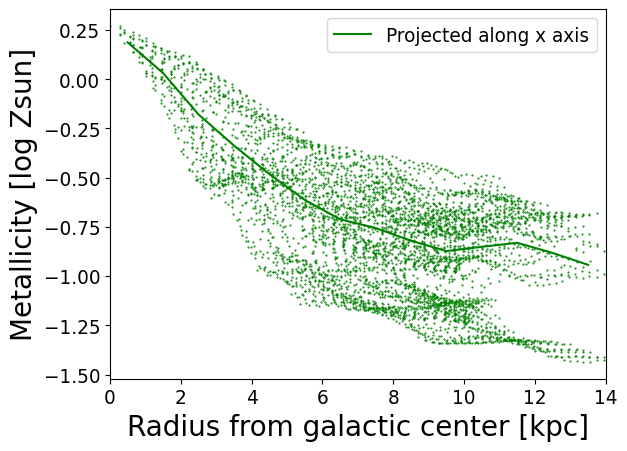

In [12]:
plt.plot(radiuslist, np.log10(metallicitylist), 'g-', label = 'Projected along x axis')
#plt.plot(radiuslist, np.log10(metallicitylist),'go', markersize=markersize)
#plt.plot(radiuslist2, np.log10(metallicitylist2), 'r-',label = 'Projected along y axis')
#plt.plot(radiuslist2, np.log10(metallicitylist2),'ro',markersize=markersize)
#plt.plot(radiuslist3, np.log10(metallicitylist3), 'b-',label = 'Projected along z axis')
#plt.plot(radiuslist3, np.log10(metallicitylist3),'bo', markersize=markersize)
plt.plot(OD_Rad, np.log10(OD_Met), 'go', markersize = 0.5)
#plt.plot(OD_Rad2, np.log10(OD_Met2), 'ro', markersize = 0.5)
#plt.plot(OD_Rad3, np.log10(OD_Met3), 'bo', markersize = 0.5)
plt.xlabel("Radius from galactic center [kpc]", fontsize = fontsize)
plt.ylabel("Metallicity [log Zsun]", fontsize = fontsize)
plt.legend(loc="upper right", fontsize = fontsize/1.5)
plt.xticks(fontsize = fontsize/1.5)
plt.yticks(fontsize = fontsize/1.5)
plt.xlim([min_radius, max_radius])